# Team JAsh : Ashutosh Singh and Jayasree Mangalagiri
## An education company named X Education sells online courses to industry professionals.The company advertises on differn platforms. Our task is to find the probability of a lead to convert.

In [613]:
# Import all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 500)

In [614]:
# Read the data
df=pd.read_csv("Leads.csv")

### Exploring the data for the shape/ info/ missing values and performing other checks

In [615]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Changing the names of the variable to make is easy to work with 

In [616]:
df=df.rename(columns={'Prospect ID':'ID','Lead Number':'Lead_Number',
                                     'Lead Source':'Lead_Source','Do Not Email':'Email', 'Do Not Call':'Call',
                                      'Total Time Spent on Website':'Time_On_Website','Page Views Per Visit':'Pages_Viewed',
                                      'Last Activity':'Last_Activity','How did you hear about X Education':'?Heard_XEd',
                                      'What is your current occupation':'Occupation','What matters most to you in choosing a course':'?Choose_Course',
                                      'Newspaper Article':'News_Article','X Education Forums':'XEd_Forums','Digital Advertisement':'Digital_Ads',
                                      'Through Recommendations':'Recommends','Receive More Updates About Our Courses':'Rec_Course_Updates','Lead Quality':'Lead_Quality',
                                      'Update me on Supply Chain Content':'Rec_Sup_Cha_Updates','Get updates on DM Content':'Rec_DM_Updates',
                                      'Lead Profile':'Lead_Profile','I agree to pay the amount through cheque':'Check_Payment','A free copy of Mastering The Interview':'Free_Copy',
                                      'Last Notable Activity':'Last_NActivity','Asymmetrique Activity Index':'Activity_Index','Asymmetrique Profile Index':'Profile_Index',
                                     'Asymmetrique Profile Score':'Profile_Score','Asymmetrique Activity Score':'Activity_Score'})

In [617]:
df.describe()

,Lead_Number,Converted,TotalVisits,Time_On_Website,Pages_Viewed,Activity_Score,Profile_Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
ID                     9240 non-null object
Lead_Number            9240 non-null int64
Lead Origin            9240 non-null object
Lead_Source            9204 non-null object
Email                  9240 non-null object
Call                   9240 non-null object
Converted              9240 non-null int64
TotalVisits            9103 non-null float64
Time_On_Website        9240 non-null int64
Pages_Viewed           9103 non-null float64
Last_Activity          9137 non-null object
Country                6779 non-null object
Specialization         7802 non-null object
?Heard_XEd             7033 non-null object
Occupation             6550 non-null object
?Choose_Course         6531 non-null object
Search                 9240 non-null object
Magazine               9240 non-null object
News_Article           9240 non-null object
XEd_Forums             9240 non-null object
Newspaper     

## Checking what percent of previous prospects turned to converts

In [619]:
df["Converted"].value_counts()/len(df["Converted"])

0    0.61461
1    0.38539
Name: Converted, dtype: float64

### About 39% of the prospect converted

## Note: There are several columns have the value called "select", which means the prospect was presented with a choice to make a selection but the prospect skipped through that option, so we wil consider them as null values

In [620]:
df=df.replace("Select",np.NaN)

In [621]:
#checking missing values
round(((df.isnull().sum())/len(df))*100,2)

ID                      0.00
Lead_Number             0.00
Lead Origin             0.00
Lead_Source             0.39
Email                   0.00
Call                    0.00
Converted               0.00
TotalVisits             1.48
Time_On_Website         0.00
Pages_Viewed            1.48
Last_Activity           1.11
Country                26.63
Specialization         36.58
?Heard_XEd             78.46
Occupation             29.11
?Choose_Course         29.32
Search                  0.00
Magazine                0.00
News_Article            0.00
XEd_Forums              0.00
Newspaper               0.00
Digital_Ads             0.00
Recommends              0.00
Rec_Course_Updates      0.00
Tags                   36.29
Lead_Quality           51.59
Rec_Sup_Cha_Updates     0.00
Rec_DM_Updates          0.00
Lead_Profile           74.19
City                   39.71
Activity_Index         45.65
Profile_Index          45.65
Activity_Score         45.65
Profile_Score          45.65
Check_Payment 

### Dropping columns that are missing more than 45% of the data

In [622]:
df=df[df.columns[(df.isnull().sum())/len(df)*100<45.00]]

In [623]:
round(((df.isnull().sum())/len(df))*100,2)

ID                      0.00
Lead_Number             0.00
Lead Origin             0.00
Lead_Source             0.39
Email                   0.00
Call                    0.00
Converted               0.00
TotalVisits             1.48
Time_On_Website         0.00
Pages_Viewed            1.48
Last_Activity           1.11
Country                26.63
Specialization         36.58
Occupation             29.11
?Choose_Course         29.32
Search                  0.00
Magazine                0.00
News_Article            0.00
XEd_Forums              0.00
Newspaper               0.00
Digital_Ads             0.00
Recommends              0.00
Rec_Course_Updates      0.00
Tags                   36.29
Rec_Sup_Cha_Updates     0.00
Rec_DM_Updates          0.00
City                   39.71
Check_Payment           0.00
Free_Copy               0.00
Last_NActivity          0.00
dtype: float64

In [624]:
df.shape

(9240, 30)

### check unique values and drop the ones that have only one unique value 

In [625]:
df.nunique()

ID                     9240
Lead_Number            9240
Lead Origin               5
Lead_Source              21
Email                     2
Call                      2
Converted                 2
TotalVisits              41
Time_On_Website        1731
Pages_Viewed            114
Last_Activity            17
Country                  38
Specialization           18
Occupation                6
?Choose_Course            3
Search                    2
Magazine                  1
News_Article              2
XEd_Forums                2
Newspaper                 2
Digital_Ads               2
Recommends                2
Rec_Course_Updates        1
Tags                     26
Rec_Sup_Cha_Updates       1
Rec_DM_Updates            1
City                      6
Check_Payment             1
Free_Copy                 2
Last_NActivity           16
dtype: int64

In [626]:
df.drop(["Magazine","Rec_Course_Updates","Rec_Sup_Cha_Updates","Rec_DM_Updates","Check_Payment"],1,inplace=True)

### check for 2 unique values

In [627]:
df.columns

Index(['ID', 'Lead_Number', 'Lead Origin', 'Lead_Source', 'Email', 'Call',
       'Converted', 'TotalVisits', 'Time_On_Website', 'Pages_Viewed',
       'Last_Activity', 'Country', 'Specialization', 'Occupation',
       '?Choose_Course', 'Search', 'News_Article', 'XEd_Forums', 'Newspaper',
       'Digital_Ads', 'Recommends', 'Tags', 'City', 'Free_Copy',
       'Last_NActivity'],
      dtype='object')

In [628]:
df_2=df.loc[:,df.nunique().values==2]

In [629]:
df_2.columns

Index(['Email', 'Call', 'Converted', 'Search', 'News_Article', 'XEd_Forums',
       'Newspaper', 'Digital_Ads', 'Recommends', 'Free_Copy'],
      dtype='object')

### checking imbalance in the data with 2 unique values and dropping the ones with more than 40% imblance

In [630]:
for i in df_2.columns:
    print(df_2[i].value_counts())


No     8506
Yes     734
Name: Email, dtype: int64
No     9238
Yes       2
Name: Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     9238
Yes       2
Name: News_Article, dtype: int64
No     9239
Yes       1
Name: XEd_Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital_Ads, dtype: int64
No     9233
Yes       7
Name: Recommends, dtype: int64
No     6352
Yes    2888
Name: Free_Copy, dtype: int64


In [631]:
df.drop(['Email', 'Call', 'Search', 'News_Article', 'XEd_Forums','Newspaper','Digital_Ads','Recommends'],1,inplace=True)

In [632]:
df.shape

(9240, 17)

In [633]:
df.columns

Index(['ID', 'Lead_Number', 'Lead Origin', 'Lead_Source', 'Converted',
       'TotalVisits', 'Time_On_Website', 'Pages_Viewed', 'Last_Activity',
       'Country', 'Specialization', 'Occupation', '?Choose_Course', 'Tags',
       'City', 'Free_Copy', 'Last_NActivity'],
      dtype='object')

In [634]:
df.nunique()

ID                 9240
Lead_Number        9240
Lead Origin           5
Lead_Source          21
Converted             2
TotalVisits          41
Time_On_Website    1731
Pages_Viewed        114
Last_Activity        17
Country              38
Specialization       18
Occupation            6
?Choose_Course        3
Tags                 26
City                  6
Free_Copy             2
Last_NActivity       16
dtype: int64

## Variable: Lead_Origin

In [635]:
df["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [636]:
df["Lead Origin"].loc[(df["Lead Origin"]=='Lead Add Form')] = 'Lead Add Form'

In [637]:
df["Lead Origin"].loc[(df["Lead Origin"]=='Lead Import')] = 'Lead Add Form'

In [638]:
df["Lead Origin"].loc[(df["Lead Origin"]=='Quick Add Form')] = 'Lead Add Form'

In [639]:
df["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               774
Name: Lead Origin, dtype: int64

In [640]:
df["Lead Origin"].value_counts().sum()#No nulls

9240

In [641]:
df.shape

(9240, 17)

### Summary : Lead Origin had the following low values Lead Import = 55 Quick Add Form=1, so they were combined with Lead Add Form 

## Lead_Source

In [642]:
df["Lead_Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
youtubechannel          1
blog                    1
NC_EDM                  1
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
Name: Lead_Source, dtype: int64

In [643]:
df["Lead_Source"].loc[(df["Lead_Source"]=='google')]='Google'

In [644]:
df["Lead_Source"].value_counts()[4:].index

Index(['Reference', 'Welingak Website', 'Referral Sites', 'Facebook', 'bing',
       'Click2call', 'Social Media', 'Live Chat', 'Press_Release',
       'youtubechannel', 'blog', 'NC_EDM', 'testone', 'welearnblog_Home',
       'Pay per Click Ads', 'WeLearn'],
      dtype='object')

In [645]:
df["Lead_Source"][df["Lead_Source"].isin(df["Lead_Source"].value_counts()[4:].index)]="Other"

In [646]:
df['Lead_Source'].value_counts()

Google            2873
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Other              879
Name: Lead_Source, dtype: int64

In [647]:
df['Lead_Source'].value_counts().sum() #A few null values exists

9204

In [648]:
df.shape

(9240, 17)

## Summary : The following values were combined in to category "other"
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
blog                    1
NC_EDM                  1
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
WeLearn                 1

df["Last_Activity"].value_counts()

In [649]:
df["Last_Activity"].loc[(df["Last_Activity"]=='Email Opened')]='1potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Olark Chat Conversation')]='1potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Converted to Lead')]='1potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Had a Phone Conversation')]='1potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Visited Booth in Tradeshow ')]='1potential'


df["Last_Activity"].loc[(df["Last_Activity"]=='Page Visited on Website')]='2potential' 
df["Last_Activity"].loc[(df["Last_Activity"]=='Resubscribed to emails')]='2potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Email Received')]='2potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Form Submitted on Website')]='2potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Approached upfront')]='2potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Email Link Clicked')]='2potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Visited Booth in Tradeshow')]='2potential'


df["Last_Activity"].loc[(df["Last_Activity"]=='SMS Sent')]='potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='View in browser link Clicked')]='3potential'



df["Last_Activity"].loc[(df["Last_Activity"]=='Email Bounced')]='4potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Unreachable')]='4potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Unsubscribed')]='4potential'
df["Last_Activity"].loc[(df["Last_Activity"]=='Email Marked Spam')]='4potential'

In [650]:
df["Last_Activity"].value_counts()

1potential    4868
potential     2745
2potential    1036
4potential     482
3potential       6
Name: Last_Activity, dtype: int64

## Summary : For the variable Last_Activity and Last Noted Activity
### For this category I combined values by their potential to "convert"
### if there was a two way communiction with the prospect : 1potential
### if the prospect initiated the cummunication: 2potential or 3potential
### if the contact went "cold":4potential

### Country 

In [651]:
df["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
Kuwait                     4
South Africa               4
Canada                     4
Sweden                     3
Asia/Pacific Region        2
Ghana                      2
China                      2
Netherlands                2
Belgium                    2
Italy                      2
Uganda                     2
Philippines                2
Bangladesh                 2
Tanzania                   1
Malaysia                   1
Liberia                    1
Denmark                    1
Kenya                      1
Indonesia                  1
Russia        

### The data in country is higly imbalanced "other" countries are just 4% and it has 26% null values of he entie data so let's drop it

In [652]:
df.drop("Country",1,inplace=True)

## Summary : Variable "Country" Dropped

## Specialization

In [653]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [654]:
df['Specialization'].value_counts()[-4:].index

Index(['Retail Management', 'Rural and Agribusiness', 'E-Business',
       'Services Excellence'],
      dtype='object')

In [655]:
df['Specialization'][df['Specialization'].isin(df['Specialization'].value_counts()[-4:].index)]="Other"

In [656]:
df["Specialization"].loc[(df["Specialization"]=='Hospitality Management')] = 'Hospitality Mgt & Ecommerce'
df["Specialization"].loc[(df["Specialization"]=='E-COMMERCE')] = 'Hospitality Mgt & Ecommerce'
df["Specialization"].loc[(df["Specialization"]=='Operations Management')] = 'Supply Chain Management & Operations Management'
df["Specialization"].loc[(df["Specialization"]=='Supply Chain Management')] = 'Supply Chain Management & Operations Management'


In [657]:
df['Specialization'].value_counts()

Finance Management                                 976
Supply Chain Management & Operations Management    852
Human Resource Management                          848
Marketing Management                               838
Business Administration                            403
IT Projects Management                             366
Banking, Investment And Insurance                  338
Other                                              270
Hospitality Mgt & Ecommerce                        226
Travel and Tourism                                 203
Media and Advertising                              203
International Business                             178
Healthcare Management                              159
Name: Specialization, dtype: int64

In [658]:
df.shape

(9240, 16)

## Summary:  For this variable we combined the values by same kind of specialization 
### Supply Chain Management & Operations Management 
### Hospitality Mgt & Ecommerce 



In [659]:
df.isnull().sum()/len(df)*100

ID                  0.000000
Lead_Number         0.000000
Lead Origin         0.000000
Lead_Source         0.389610
Converted           0.000000
TotalVisits         1.482684
Time_On_Website     0.000000
Pages_Viewed        1.482684
Last_Activity       1.114719
Specialization     36.580087
Occupation         29.112554
?Choose_Course     29.318182
Tags               36.287879
City               39.707792
Free_Copy           0.000000
Last_NActivity      0.000000
dtype: float64

## Occupation

In [660]:
df["Occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [661]:
df["Occupation"].value_counts()/len(df["Occupation"])*100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: Occupation, dtype: float64

In [662]:
#### The column for occupation is higly imbalanced and it has 29& NANs so let's drop it

In [663]:
df.drop("Occupation",1,inplace=True)

In [664]:
df.shape

(9240, 15)

## Summary: Variable " Occupation" Dropped 

In [665]:
##'What matters most to you in choosing a course' ?Choose_Course"

In [666]:
df["?Choose_Course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: ?Choose_Course, dtype: int64

## The column for ?Choose_Course is higly imbalanced and it has 29& NANs so it is dropped

## Tags

In [667]:
df["Tags"].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

## Summary: Since Tags are generated after the fact that the lead has a potential to convert and given goal (to actually decide if the lead has a potentialto convert) we will not consider this variable for the analysis

# City

In [668]:
df["City"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [669]:
(df["City"].value_counts()/len(df)).sum()

0.6029220779220779

## Summary :  The variable "City" is dropped

In [670]:
df.drop(["City","?Choose_Course","Tags"],1,inplace=True)

In [671]:
df.shape

(9240, 12)

In [672]:
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Visited Booth in Tradeshow ')]='1potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Email Opened')]='1potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Olark Chat Conversation')]='1potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Converted to Lead')]='1potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Had a Phone Conversation')]='1potential'

In [673]:
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Page Visited on Website')]='2potential' 
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Resubscribed to emails')]='2potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Email Received')]='2potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Form Submitted on Website')]='2potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Approached upfront')]='2potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Email Link Clicked')]='2potential'

In [674]:
df["Last_NActivity"].loc[(df["Last_NActivity"]=='View in browser link Clicked')]='3potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='SMS Sent')]='3potential'

In [675]:
df["Last_Activity"].loc[(df["Last_Activity"]=='Unsubscribed')]='4potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Email Marked Spam')]='4potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Email Bounced')]='4potential'
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Unsubscribed')]='4potential'


In [676]:
df["Last_NActivity"].loc[(df["Last_NActivity"]=='Unreachable')]='4potential'

In [677]:
df["Last_NActivity"].value_counts()

Modified      3407
1potential    3024
3potential    2173
2potential     495
4potential     141
Name: Last_NActivity, dtype: int64

## Converting columns with Yes and No to 1 and 0 respectively

In [678]:
df['Free_Copy']=df['Free_Copy'].map({'Yes': 1, 'No': 0})

In [679]:
df["Last_NActivity"].value_counts()

Modified      3407
1potential    3024
3potential    2173
2potential     495
4potential     141
Name: Last_NActivity, dtype: int64

## Impute missing values with Mode 

In [680]:
round(((df.isnull().sum())/len(df))*100,2)

ID                  0.00
Lead_Number         0.00
Lead Origin         0.00
Lead_Source         0.39
Converted           0.00
TotalVisits         1.48
Time_On_Website     0.00
Pages_Viewed        1.48
Last_Activity       1.11
Specialization     36.58
Free_Copy           0.00
Last_NActivity      0.00
dtype: float64

In [681]:
df=df.fillna(df.mode().iloc[0])

In [682]:
round(((df.isnull().sum())/len(df))*100,2)

ID                 0.0
Lead_Number        0.0
Lead Origin        0.0
Lead_Source        0.0
Converted          0.0
TotalVisits        0.0
Time_On_Website    0.0
Pages_Viewed       0.0
Last_Activity      0.0
Specialization     0.0
Free_Copy          0.0
Last_NActivity     0.0
dtype: float64

In [683]:
df.shape

(9240, 12)

## Create Dummy variables and concatenate with the data frame

In [684]:
LS = pd.get_dummies(df['Lead_Source'],prefix='Lead_Source',drop_first=True)
df = pd.concat([df,LS],axis=1)

In [685]:
LO=pd.get_dummies(df["Lead Origin"], prefix='Lead Origin',drop_first=True)
df=pd.concat([df,LO],1)

In [686]:
LA=pd.get_dummies(df["Last_Activity"],prefix="Last_Activity",drop_first=True)
df=pd.concat([df,LA],1)

In [687]:
SP=pd.get_dummies(df["Specialization"],prefix="Specialization",drop_first=True)
df=pd.concat([df,SP],1)

In [688]:
LN=pd.get_dummies(df['Last_NActivity'],prefix='Last_NActivityy',drop_first=True)
df = pd.concat([df,LN],axis=1)

### Drop Original columns 

In [689]:
df.drop(['Lead Origin','Lead_Source','Last_Activity',"Specialization","Last_NActivity"],1,inplace=True)

In [690]:
df.head()

,ID,Lead_Number,Converted,TotalVisits,Time_On_Website,Pages_Viewed,Free_Copy,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last_Activity_2potential,Last_Activity_3potential,Last_Activity_4potential,Last_Activity_potential,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Mgt & Ecommerce,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Other,Specialization_Supply Chain Management & Operations Management,Specialization_Travel and Tourism,Last_NActivityy_2potential,Last_NActivityy_3potential,Last_NActivityy_4potential,Last_NActivityy_Modified
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [691]:
df.shape

(9240, 33)

## Checking for outliers

In [692]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead_Number,Converted,TotalVisits,Time_On_Website,Pages_Viewed,Free_Copy,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last_Activity_2potential,Last_Activity_3potential,Last_Activity_4potential,Last_Activity_potential,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Mgt & Ecommerce,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Other,Specialization_Supply Chain Management & Operations Management,Specialization_Travel and Tourism,Last_NActivityy_2potential,Last_NActivityy_3potential,Last_NActivityy_4potential,Last_NActivityy_Modified
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.00000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.394156,487.698268,2.327787,0.312554,0.314827,0.189935,0.124892,0.09513,0.528788,0.083766,0.112121,0.000649,0.052165,0.297078,0.043615,0.471429,0.017208,0.024459,0.091775,0.039610,0.019264,0.090693,0.021970,0.029221,0.092208,0.021970,0.053571,0.235173,0.015260,0.368723
std,23405.995698,0.486714,4.836682,548.021466,2.164258,0.463559,0.464472,0.392271,0.330614,0.29341,0.499198,0.277052,0.315533,0.025475,0.222371,0.456996,0.204247,0.499210,0.130052,0.154477,0.288724,0.195053,0.137459,0.287187,0.146592,0.168434,0.289335,0.146592,0.225182,0.424130,0.122591,0.482485
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


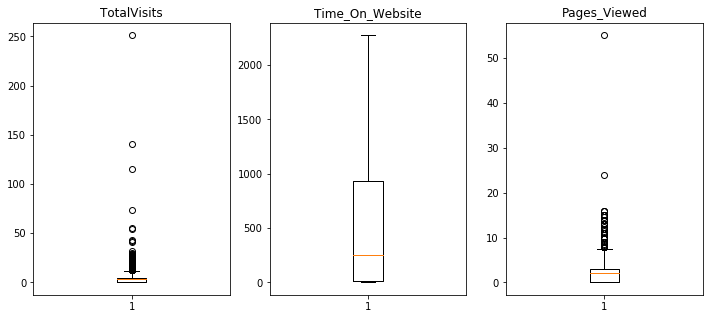

In [693]:
counter =1
for i in df.columns[3:6]:
    plt.subplot(3,3,counter)
    plt.rcParams["figure.figsize"] = [12,17]
    plt.boxplot(df[i])
    plt.title(i)
    counter = counter + 1

In [694]:
df["TotalVisits"].value_counts()

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [695]:
df[["TotalVisits","Pages_Viewed"]]

,TotalVisits,Pages_Viewed
0,0.0,0.00
1,5.0,2.50
2,2.0,2.00
3,1.0,1.00
4,2.0,1.00
5,0.0,0.00
6,2.0,2.00
7,0.0,0.00
8,2.0,2.00
9,4.0,4.00


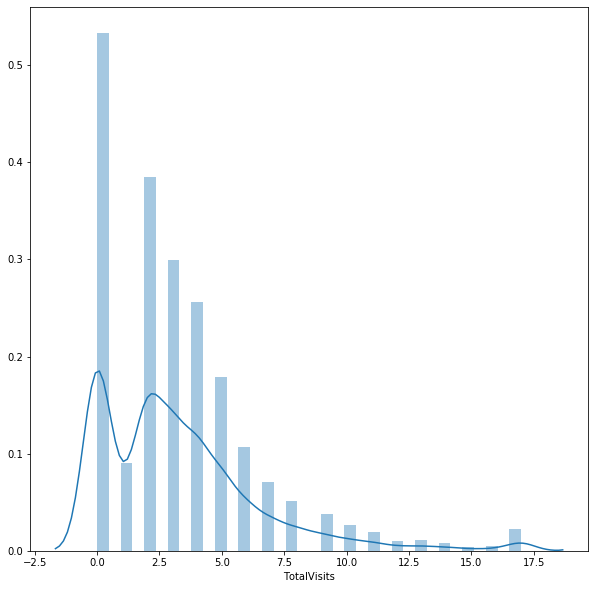

In [716]:
# distplot for Total Visits 
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df["TotalVisits"],ax=ax)
plt.show()


In [697]:
percentiles = df['TotalVisits'].quantile([0.05,0.99]).values
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

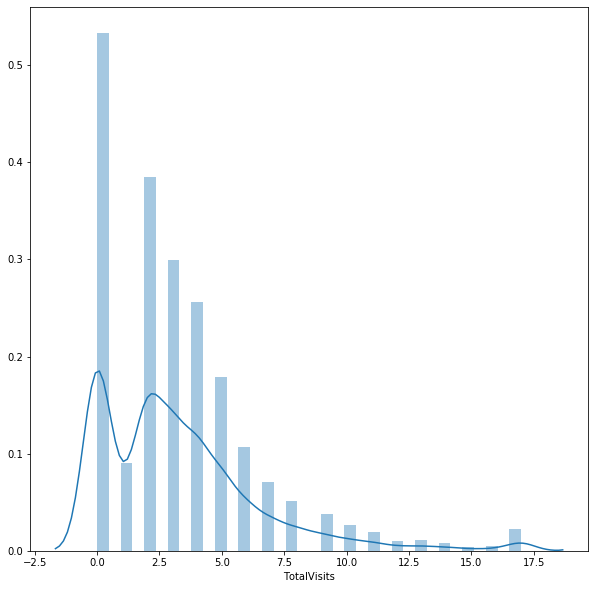

In [721]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df["TotalVisits"],ax=ax)
plt.show()


In [699]:
df["Pages_Viewed"].value_counts()

0.00     2326
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

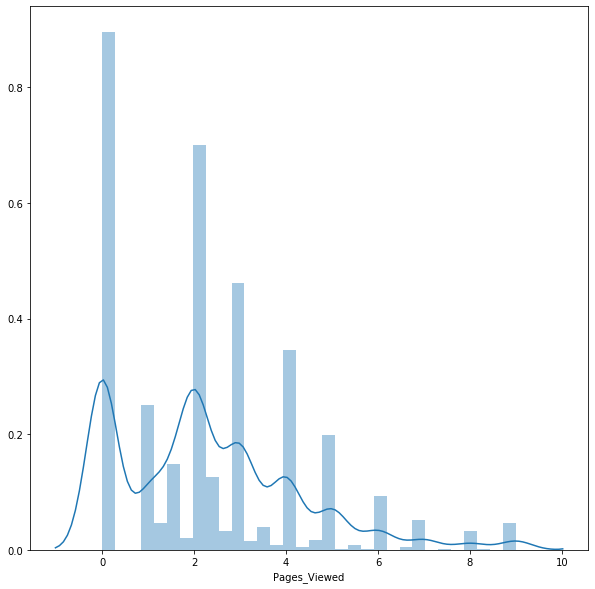

In [722]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df["Pages_Viewed"],ax=ax)
plt.show()

In [701]:
percentiles = df['Pages_Viewed'].quantile([0.05,0.99]).values
df['Pages_Viewed'][df['Pages_Viewed'] >= percentiles[1]] = percentiles[1]

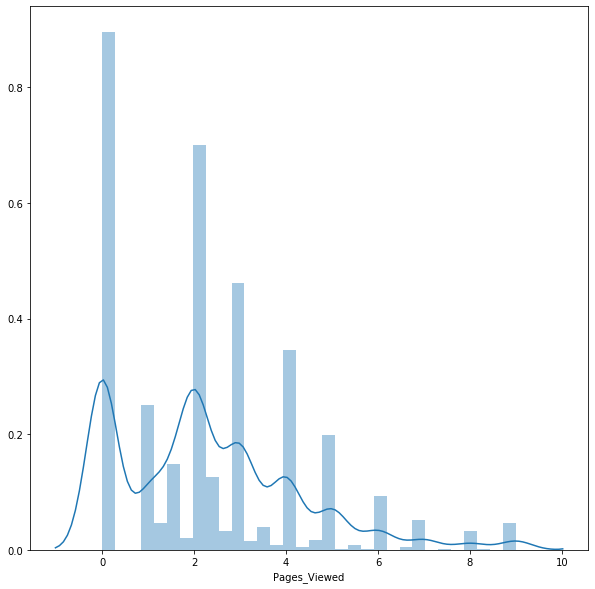

In [723]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df["Pages_Viewed"],ax=ax)
plt.show()

In [703]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead_Number,Converted,TotalVisits,Time_On_Website,Pages_Viewed,Free_Copy,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last_Activity_2potential,Last_Activity_3potential,Last_Activity_4potential,Last_Activity_potential,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Mgt & Ecommerce,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Other,Specialization_Supply Chain Management & Operations Management,Specialization_Travel and Tourism,Last_NActivityy_2potential,Last_NActivityy_3potential,Last_NActivityy_4potential,Last_NActivityy_Modified
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.00000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.283333,487.698268,2.299396,0.312554,0.314827,0.189935,0.124892,0.09513,0.528788,0.083766,0.112121,0.000649,0.052165,0.297078,0.043615,0.471429,0.017208,0.024459,0.091775,0.039610,0.019264,0.090693,0.021970,0.029221,0.092208,0.021970,0.053571,0.235173,0.015260,0.368723
std,23405.995698,0.486714,3.253250,548.021466,1.991020,0.463559,0.464472,0.392271,0.330614,0.29341,0.499198,0.277052,0.315533,0.025475,0.222371,0.456996,0.204247,0.499210,0.130052,0.154477,0.288724,0.195053,0.137459,0.287187,0.146592,0.168434,0.289335,0.146592,0.225182,0.424130,0.122591,0.482485
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


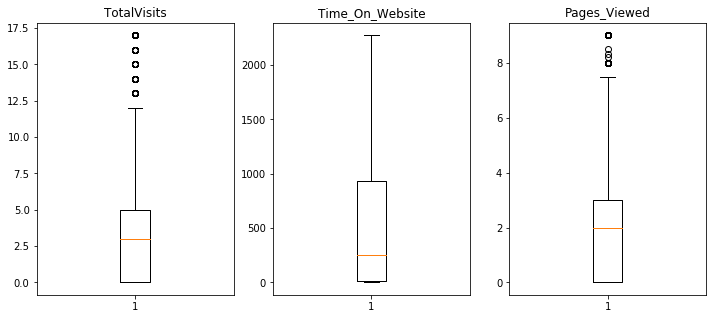

In [704]:
counter =1
for i in df.columns[3:6]:
    plt.subplot(3,3,counter)
    plt.rcParams["figure.figsize"] = [12,17]
    plt.boxplot(df[i])
    plt.title(i)
    counter = counter + 1

## What did I do with the continuous variables?
1. Checked for outliers by creating boxplots
2. Pages_Viewed and Total visits had outliers
3. I checked the distribution of the variables, they are skewed
4. I capped these at 99th percentile


## visual for the original dataframe with dummy variables
### We created a heatmap for the dataframe with dummy variables so that we can compare this with before and after RFE



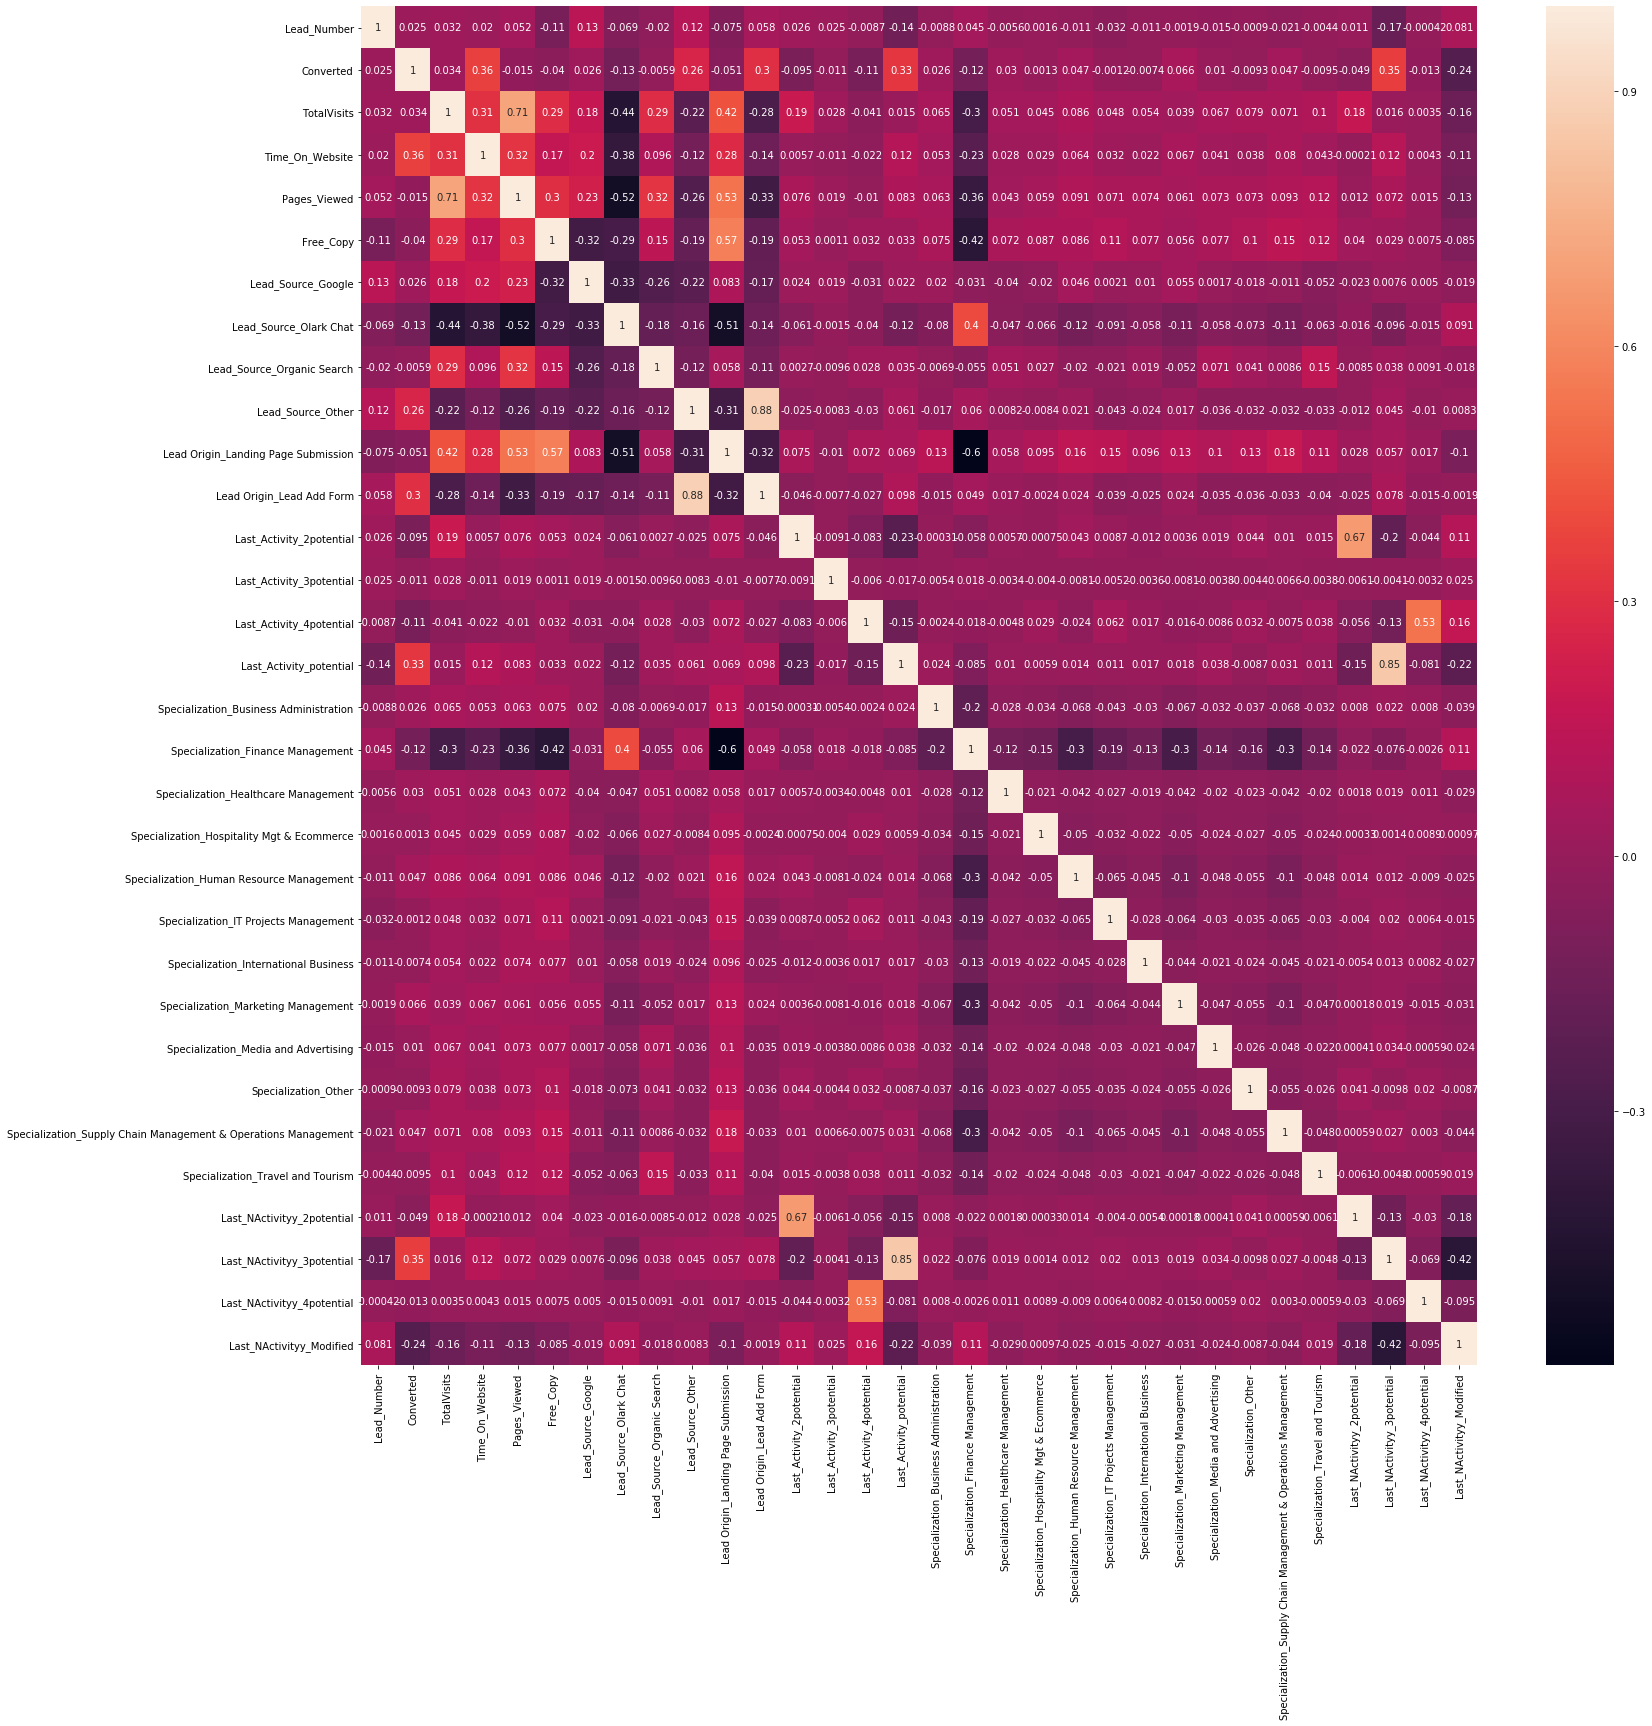

In [714]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(),annot=True, ax=ax)
plt.show()

In [707]:
#Created a copy of the original dataframe so that we can use it for visualizations before RFE
df_copy=df.copy()

## Model Building


### Creating the data frames for X and y

In [ ]:
# Assigning feature variable to X
X = df.drop(['ID','Converted','Lead_Number'],axis=1)
X.head()

In [ ]:
# Putting response variable to y
y = df.pop('Converted')
y.head()


### Splitting Data into Training and Test Sets

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
df.shape

## Normalizing the continuous variables

In [ ]:
scaler=MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_train


### Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [545]:
col = X_train.columns[rfe.support_]

In [546]:
col

Index(['TotalVisits', 'Time_On_Website', 'Pages_Viewed',
       'Lead_Source_Olark Chat', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last_Activity_4potential',
       'Last_Activity_potential', 'Specialization_Finance Management',
       'Last_NActivityy_2potential', 'Last_NActivityy_3potential',
       'Last_NActivityy_4potential', 'Last_NActivityy_Modified'],
      dtype='object')

In [708]:
df_RFE_before=df_copy.filter(['TotalVisits', 'Time_On_Website', 'Pages_Viewed',
       'Lead_Source_Olark Chat', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last_Activity_4potential',
       'Last_Activity_potential', 'Specialization_Finance Management',
       'Last_NActivityy_2potential', 'Last_NActivityy_3potential',
       'Last_NActivityy_4potential', 'Last_NActivityy_Modified'])

In [715]:
df_RFE_before.head()

,TotalVisits,Time_On_Website,Pages_Viewed,Lead_Source_Olark Chat,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last_Activity_4potential,Last_Activity_potential,Specialization_Finance Management,Last_NActivityy_2potential,Last_NActivityy_3potential,Last_NActivityy_4potential,Last_NActivityy_Modified
0,0.0,0,0.0,1,0,0,0,0,1,0,0,0,1
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,1,0,0,0,0,0,1
4,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,1


### Visual with the variables selected by RFE show up the varaibles with higher correlation. we will perform RFE and compare the heatmap at the end as well

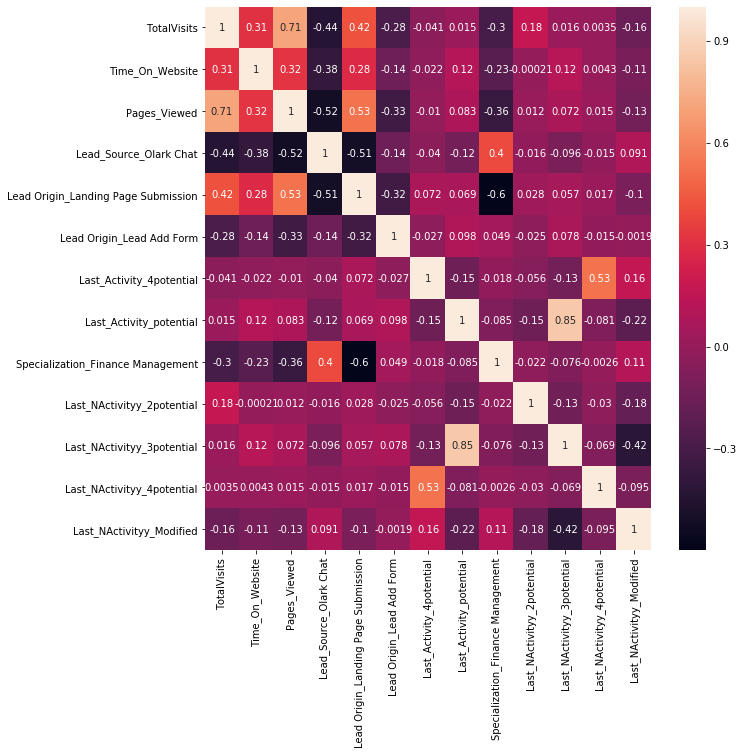

In [710]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_RFE_before.corr(),annot=True, ax=ax)
plt.show()

## Creating and Assessing the model with StatsModels

In [226]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2928.0
Date:                Mon, 20 Apr 2020   Deviance:                       5855.9
Time:                        00:02:36   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.5322      0.136    -11.304      0.000      -1.798      -1.267
TotalVisits                             1.3001      0.236      5.511      0.000       0.838       1.762
Time_On_Website                         4.5878      0.159     28.785      0.000       4.275       4.900
Pages_Viewed                           -0.8404      0.235     -3.578      0.000      -1.301      -0.380
Lead_Source_Olark Chat                  0.8615      0.127      6.776      0.000       0.612       1.111
Lead Origin_Landing Page Submission    -0.5312      0.101     -5.251      0.000      -0.729      -0.333
Lead Origin_Lead Add Form               3.4704      0.172     20.129      0.000       3.133       3.808
Last_Activity_4potential               -1.4084      0.314     -4.479      0.000      -2.025      -0.792
Last_Activity_potential                 0.8045      0.144      5.573      0.000       0.522       1.087
Specialization_Finance Management      -0.5986      0.085     -7.023      0.000      -0.766      -0.432
Last_NActivityy_2potential             -0.5326      0.154     -3.457      0.001      -0.835      -0.231
Last_NActivityy_3potential              0.5711      0.166      3.442      0.001       0.246       0.896
Last_NActivityy_4potential              1.3301      0.409      3.254      0.001       0.529       2.131
Last_NActivityy_Modified               -0.8645      0.090     -9.558      0.000      -1.042      -0.687
=======================================================================================================
"""

## Checking VIFs

In [227]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [228]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last_NActivityy_3potential,6.29
7,Last_Activity_potential,6.01
2,Pages_Viewed,5.58
0,TotalVisits,4.26
4,Lead Origin_Landing Page Submission,3.26
12,Last_NActivityy_Modified,2.30
8,Specialization_Finance Management,2.22
1,Time_On_Website,2.03
3,Lead_Source_Olark Chat,1.72
6,Last_Activity_4potential,1.61


There are a few variables with high VIF. Let's drop them as the variance is alred

In [229]:
col = col.drop('Last_NActivityy_3potential', 1)
col

Index(['TotalVisits', 'Time_On_Website', 'Pages_Viewed',
       'Lead_Source_Olark Chat', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Last_Activity_4potential',
       'Last_Activity_potential', 'Specialization_Finance Management',
       'Last_NActivityy_2potential', 'Last_NActivityy_4potential',
       'Last_NActivityy_Modified'],
      dtype='object')

In [230]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2933.9
Date:                Mon, 20 Apr 2020   Deviance:                       5867.9
Time:                        00:02:36   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.4678      0.134    -10.960      0.000      -1.730      -1.205
TotalVisits                             1.2844      0.236      5.446      0.000       0.822       1.747
Time_On_Website                         4.5873      0.159     28.809      0.000       4.275       4.899
Pages_Viewed                           -0.8534      0.235     -3.639      0.000      -1.313      -0.394
Lead_Source_Olark Chat                  0.8664      0.127      6.814      0.000       0.617       1.116
Lead Origin_Landing Page Submission    -0.5315      0.101     -5.256      0.000      -0.730      -0.333
Lead Origin_Lead Add Form               3.4539      0.172     20.045      0.000       3.116       3.792
Last_Activity_4potential               -1.2945      0.313     -4.140      0.000      -1.907      -0.682
Last_Activity_potential                 1.2346      0.072     17.185      0.000       1.094       1.375
Specialization_Finance Management      -0.5935      0.085     -6.976      0.000      -0.760      -0.427
Last_NActivityy_2potential             -0.5893      0.153     -3.853      0.000      -0.889      -0.290
Last_NActivityy_4potential              1.1565      0.405      2.852      0.004       0.362       1.951
Last_NActivityy_Modified               -1.0367      0.076    -13.565      0.000      -1.187      -0.887
=======================================================================================================
"""

In [231]:
#Check The VIF values again

In [232]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Pages_Viewed,5.58
0,TotalVisits,4.26
4,Lead Origin_Landing Page Submission,3.23
8,Specialization_Finance Management,2.19
1,Time_On_Website,2.01
11,Last_NActivityy_Modified,1.75
3,Lead_Source_Olark Chat,1.69
7,Last_Activity_potential,1.60
6,Last_Activity_4potential,1.58
10,Last_NActivityy_4potential,1.46


In [233]:
col = col.drop(['Pages_Viewed'], 1)
col

Index(['TotalVisits', 'Time_On_Website', 'Lead_Source_Olark Chat',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last_Activity_4potential', 'Last_Activity_potential',
       'Specialization_Finance Management', 'Last_NActivityy_2potential',
       'Last_NActivityy_4potential', 'Last_NActivityy_Modified'],
      dtype='object')

In [234]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2940.6
Date:                Mon, 20 Apr 2020   Deviance:                       5881.3
Time:                        00:02:36   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.6209      0.127    -12.721      0.000      -1.871      -1.371
TotalVisits                             0.8467      0.203      4.165      0.000       0.448       1.245
Time_On_Website                         4.5804      0.159     28.800      0.000       4.269       4.892
Lead_Source_Olark Chat                  1.0023      0.122      8.229      0.000       0.764       1.241
Lead Origin_Landing Page Submission    -0.5757      0.100     -5.746      0.000      -0.772      -0.379
Lead Origin_Lead Add Form               3.5943      0.168     21.384      0.000       3.265       3.924
Last_Activity_4potential               -1.2700      0.313     -4.057      0.000      -1.884      -0.656
Last_Activity_potential                 1.2172      0.072     17.015      0.000       1.077       1.357
Specialization_Finance Management      -0.5812      0.085     -6.847      0.000      -0.748      -0.415
Last_NActivityy_2potential             -0.5077      0.150     -3.376      0.001      -0.802      -0.213
Last_NActivityy_4potential              1.1438      0.406      2.818      0.005       0.348       1.939
Last_NActivityy_Modified               -1.0303      0.076    -13.495      0.000      -1.180      -0.881
=======================================================================================================
"""

In [235]:
#Checking to make sure VIF is good 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,2.70
0,TotalVisits,2.62
7,Specialization_Finance Management,2.12
1,Time_On_Website,1.99
10,Last_NActivityy_Modified,1.74
2,Lead_Source_Olark Chat,1.66
5,Last_Activity_4potential,1.58
6,Last_Activity_potential,1.58
9,Last_NActivityy_4potential,1.46
4,Lead Origin_Lead Add Form,1.21


## Let's also drop the variables with negative coefficients

In [236]:
col = col.drop(['Last_Activity_4potential','Last_NActivityy_Modified','Lead Origin_Landing Page Submission','Last_NActivityy_2potential','Specialization_Finance Management'], 1)
col


Index(['TotalVisits', 'Time_On_Website', 'Lead_Source_Olark Chat',
       'Lead Origin_Lead Add Form', 'Last_Activity_potential',
       'Last_NActivityy_4potential'],
      dtype='object')

In [237]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6461
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3094.3
Date:                Mon, 20 Apr 2020   Deviance:                       6188.6
Time:                        00:02:37   Pearson chi2:                 6.82e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -2.7562      0.086    -32.099      0.000      -2.924      -2.588
TotalVisits                    1.0972      0.190      5.766      0.000       0.724       1.470
Time_On_Website                4.5966      0.155     29.663      0.000       4.293       4.900
Lead_Source_Olark Chat         1.1493      0.103     11.118      0.000       0.947       1.352
Lead Origin_Lead Add Form      3.8544      0.154     25.025      0.000       3.552       4.156
Last_Activity_potential        1.4472      0.068     21.354      0.000       1.314       1.580
Last_NActivityy_4potential     0.3188      0.259      1.231      0.218      -0.189       0.826
==============================================================================================
"""

In [238]:
#Checking to make sure VIF is good 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Time_On_Website,1.78
0,TotalVisits,1.71
4,Last_Activity_potential,1.39
3,Lead Origin_Lead Add Form,1.08
2,Lead_Source_Olark Chat,1.02
5,Last_NActivityy_4potential,1.01


## After I dropped all the variable with negative coefficients, P-Value of Last_NActivityy_4potential rendered it insignificant, so we droppped it.

In [239]:
col = col.drop(["Last_NActivityy_4potential"], 1)
col


Index(['TotalVisits', 'Time_On_Website', 'Lead_Source_Olark Chat',
       'Lead Origin_Lead Add Form', 'Last_Activity_potential'],
      dtype='object')

In [240]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6462
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3095.0
Date:                Mon, 20 Apr 2020   Deviance:                       6190.1
Time:                        00:02:40   Pearson chi2:                 6.83e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.7473      0.085    -32.137      0.000      -2.915      -2.580
TotalVisits                   1.0939      0.190      5.751      0.000       0.721       1.467
Time_On_Website               4.5964      0.155     29.667      0.000       4.293       4.900
Lead_Source_Olark Chat        1.1454      0.103     11.088      0.000       0.943       1.348
Lead Origin_Lead Add Form     3.8517      0.154     25.014      0.000       3.550       4.153
Last_Activity_potential       1.4398      0.067     21.340      0.000       1.308       1.572
=============================================================================================
"""

## Summary : We started by choosing 13 variable to create our model
                  we dropped the variables with high VIF and P-values rending the variabes insignificant
                  we dropped the varibales with negative coefficients
                  we arrived with 5 variables to perform further analysis on

In [466]:
df.columns

Index(['ID', 'Lead_Number', 'TotalVisits', 'Time_On_Website', 'Pages_Viewed',
       'Free_Copy', 'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Other',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last_Activity_2potential', 'Last_Activity_3potential',
       'Last_Activity_4potential', 'Last_Activity_potential',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Mgt & Ecommerce',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising', 'Specialization_Other',
       'Specialization_Supply Chain Management & Operations Management',
       'Specialization_Travel and Tourism', 'Last_NActivityy_2pote

In [471]:
df_RFE=df.filter(["TotalVisits","Time_On_Website","Last_Activity_potential",'Lead Origin_Lead Add Form','Lead_Source_Olark Chat'])

In [472]:
df_RFE.head()

,TotalVisits,Time_On_Website,Last_Activity_potential,Lead Origin_Lead Add Form,Lead_Source_Olark Chat
0,0.0,0,0,0,1
1,5.0,674,0,0,0
2,2.0,1532,0,0,0
3,1.0,305,0,0,0
4,2.0,1428,0,0,0


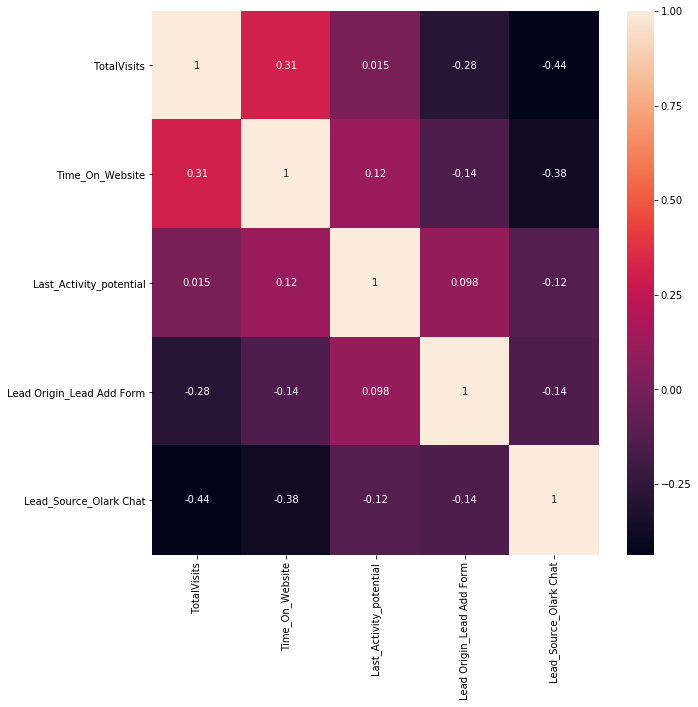

In [482]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_RFE.corr(),annot=True, ax=ax)
plt.show()

## Predicting the probabilities of leads that will convert

In [241]:
#Checking to make sure VIF is good 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Time_On_Website,1.78
0,TotalVisits,1.71
4,Last_Activity_potential,1.39
3,Lead Origin_Lead Add Form,1.08
2,Lead_Source_Olark Chat,1.02


In [242]:
## Creating a Df for y_train

In [243]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.167712
6795    0.181730
3516    0.256213
8105    0.817959
3934    0.167712
4844    0.879585
3297    0.106700
8071    0.857445
987     0.262282
7423    0.885702
dtype: float64

In [244]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})

In [245]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead_Number'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number
1871,0,0.167712,1871
6795,0,0.181730,6795
3516,0,0.256213,3516
8105,0,0.817959,8105
3934,0,0.167712,3934


In [246]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number,predicted
1871,0,0.167712,1871,0
6795,0,0.181730,6795,0
3516,0,0.256213,3516,0
8105,0,0.817959,8105,1
3934,0,0.167712,3934,0


## Analyzing the metrics obtained from the above features

In [247]:
#Predicting the y values for the train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [248]:
y_train_pred[:10]

array([0.1677122 , 0.18173035, 0.2562129 , 0.81795922, 0.1677122 ,
       0.87958533, 0.10670017, 0.85744511, 0.26228157, 0.88570174])

In [249]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[2940, 1062],
       [ 446, 2020]])

## Accuracy

In [250]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.766852195423624


## Sensitivity

In [251]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [252]:
TP / float(TP+FN)

0.819140308191403

## Precision

In [253]:
TP/float(TP+FP)

0.6554185593770279

## Precision-Recall Curve

<function matplotlib.pyplot.show(*args, **kw)>

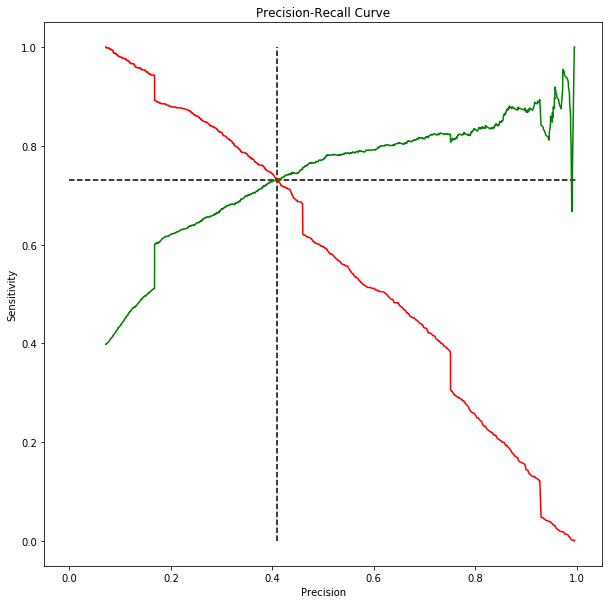

In [790]:
plt.rcParams["figure.figsize"] = (10,10)
p,r,thresholds=precision_recall_curve(y_pred_final.Converted,y_pred_final.Convert_Prob)
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-") 
plt.title('Precision-Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Sensitivity')
plt.vlines(x=0.41, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.73,xmax=1, xmin=0, colors="k", linestyles="--")


plt.show


## Summary Of Precision-Recall Curve : The curve shows the trade off between precision and recall/Sensitivity. As sensitivity decreases precision increases.
## Given that X_education wants us to find the prospects with high probability to convert, we have to have lower number of false negatives hence we chose "Sensitivity" as the metric to dictate our model.

## Specificity

In [255]:
TN / float(TN+FP)

0.7346326836581709

## Summary of the Metrics indicates that the model is 77% accurate that 82% of times the converts predicted by the model actually convert
Accuracy=0.77
Sensitivty=0.82
Precision =0.65


## Plotting the ROC Curve ( Specificity on X versus Sensitivity on Y) to check the optimal value for predicting whether a new observation is a "failure" (0) or a "success" (1).

In [256]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [257]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

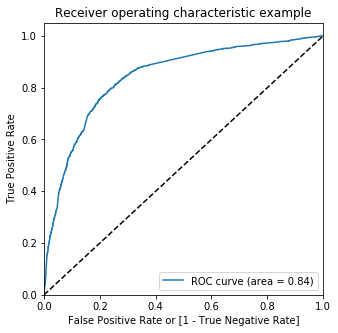

In [741]:
plt.rcParams["figure.figsize"] = (10,10)
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)


## ROC of 84% indicates the acccuracy  a prospect converting to a Hot lead if we
## choose x >0.5 as the cut off as " probability of converting"

 # Finding Optimal Cutoff Point.
### We will plot four metrics ,probability VS Accuracy, Sensitivity, Specificity and Accuracy to obtain the optimal cut off point and then check the metrics again. 

In [259]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.167712,1871,0,1,1,0,0,0,0,0,0,0,0
6795,0,0.181730,6795,0,1,1,0,0,0,0,0,0,0,0
3516,0,0.256213,3516,0,1,1,1,0,0,0,0,0,0,0
8105,0,0.817959,8105,1,1,1,1,1,1,1,1,1,1,0
3934,0,0.167712,3934,0,1,1,0,0,0,0,0,0,0,0


##  Now let's calculate accuracy sensitivity,specificity and precision for various probability cutoffs to see how they behave in comparision and then pick out Optimal Cut-off for probability.

In [260]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    preci=  cm1[1,1]/(cm1[1,1]+cm1[0,1])
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci]
print(cutoff_df)

     prob  accuracy     sensi     speci     preci
0.0   0.0  0.381262  1.000000  0.000000  0.381262
0.1   0.1  0.481602  0.974858  0.177661  0.422125
0.2   0.2  0.741806  0.878345  0.657671  0.612557
0.3   0.3  0.766852  0.819140  0.734633  0.655419
0.4   0.4  0.783395  0.738848  0.810845  0.706475
0.5   0.5  0.774273  0.607056  0.877311  0.753018
0.6   0.6  0.765925  0.528386  0.912294  0.787787
0.7   0.7  0.746599  0.440389  0.935282  0.807435
0.8   0.8  0.706092  0.284266  0.966017  0.837515
0.9   0.9  0.674242  0.166667  0.987006  0.887689


## Let's plot accuracy sensitivity and specificity for various probabilities.

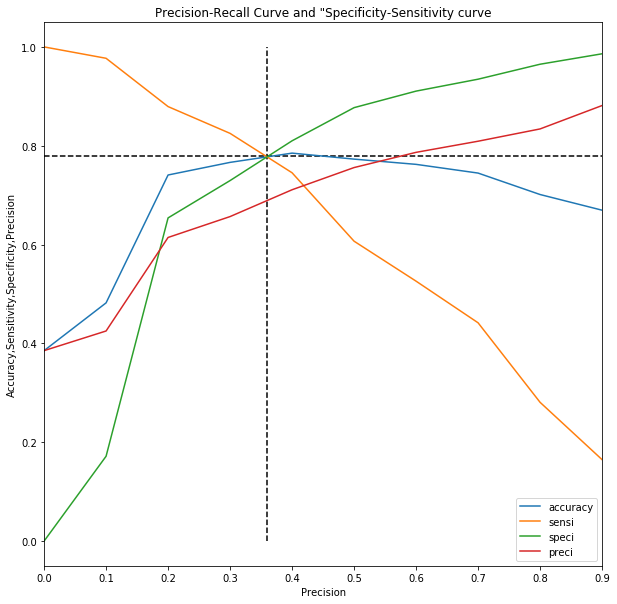

In [793]:
plt.rcParams["figure.figsize"] = (10,10)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','preci'])
plt.title('Precision-Recall Curve and "Specificity-Sensitivity curve')
plt.xlabel('Precision')
plt.ylabel('Accuracy,Sensitivity,Specificity,Precision')
plt.vlines(x=0.36, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.78,xmax=1, xmin=0, colors="k", linestyles="--")
plt.show()

In [807]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.167712,1871,0,1,1,0,0,0,0,0,0,0,0,0
6795,0,0.181730,6795,0,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.256213,3516,0,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.817959,8105,1,1,1,1,1,1,1,1,1,1,0,1
3934,0,0.167712,3934,0,1,1,0,0,0,0,0,0,0,0,0


## Let's check the overall accuracy.

In [808]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.766852195423624

In [809]:
confusion_opti = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_opti

array([[2940, 1062],
       [ 446, 2020]])

In [810]:
TP = confusion_opti[1,1] # true positive 
TN = confusion_opti[0,0] # true negatives
FP = confusion_opti[0,1] # false positives
FN = confusion_opti[1,0] # false negatives

# sensitivity of our logistic regression model

In [811]:
#sensitivity of our logistic regression model
TP / float(TP+FN)

0.819140308191403

## Precision

In [812]:
TP/float(TP+FP)

0.6554185593770279

In [813]:
# specificity
TN / float(TN+FP)

0.7346326836581709

## Summary of Finding the optimum cutoff value 
### Summary of the above plot from the above plot we chose the Optimal values resulting from the intersection of specificity and sensitivity == 0.3 and the intersection of specificity and Precision =0.45 and we determined that the cut off from the specificity and sensitivity == 0.3 resulted in a better spcificity which is what is desirable for our model.

## Making predictions on the test set

In [814]:
X_test.head()

,TotalVisits,Time_On_Website,Lead_Source_Olark Chat,Lead Origin_Lead Add Form,Last_Activity_potential
4269,0.470588,0.448735,0.0,0.0,1.0
2376,0.000000,0.000000,0.0,1.0,1.0
7766,0.294118,0.026187,0.0,0.0,0.0
9199,0.000000,0.000000,1.0,0.0,0.0
4359,0.000000,0.000000,0.0,1.0,0.0


In [815]:
X_test[X_test.columns] = scaler.fit_transform(X_test)

In [816]:
X_test = X_test[col]
X_test
X_test.head()

,TotalVisits,Time_On_Website,Lead_Source_Olark Chat,Lead Origin_Lead Add Form,Last_Activity_potential
4269,0.470588,0.448735,0.0,0.0,1.0
2376,0.000000,0.000000,0.0,1.0,1.0
7766,0.294118,0.026187,0.0,0.0,0.0
9199,0.000000,0.000000,1.0,0.0,0.0
4359,0.000000,0.000000,0.0,1.0,0.0


In [272]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]

In [273]:
y_test_pred = res.predict(X_test_sm)

In [274]:
y_test_pred[:10]

4269    0.780712
2376    0.927178
7766    0.090694
9199    0.167712
4359    0.751077
9186    0.581057
1631    0.411225
8963    0.118418
8007    0.135586
5324    0.312584
dtype: float64

In [275]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [276]:
y_pred_1[:].head()

,0
4269,0.780712
2376,0.927178
7766,0.090694
9199,0.167712
4359,0.751077


In [277]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [278]:
# Putting Lead_Number to index
y_test_df['Lead_Number'] = y_test_df.index

In [279]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [280]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [281]:
y_pred_final.head()

,Converted,Lead_Number,0
0,1,4269,0.780712
1,1,2376,0.927178
2,1,7766,0.090694
3,0,9199,0.167712
4,1,4359,0.751077


In [282]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [283]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead_Number','Converted','Convert_Prob'], axis=1)

In [284]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead_Number,Converted,Convert_Prob
0,4269,1,0.780712
1,2376,1,0.927178
2,7766,1,0.090694
3,9199,0,0.167712
4,4359,1,0.751077


In [285]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [286]:
y_pred_final.head()

,Lead_Number,Converted,Convert_Prob,final_predicted
0,4269,1,0.780712,1
1,2376,1,0.927178,1
2,7766,1,0.090694,0
3,9199,0,0.167712,0
4,4359,1,0.751077,1


In [287]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1236,  441],
       [ 190,  905]])

In [288]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

## sensitivity 

In [289]:
TP / float(TP+FN)

0.8264840182648402

## Precision     

In [290]:
TP/float(TP+FP)

0.6723625557206538

## specificity

In [291]:
TN / float(TN+FP)

0.7370304114490162

## Accuracy.

In [292]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7723665223665224

## Final Model and Lead Score

## Fitting the scaler on the main dataframe

In [293]:
X[['TotalVisits','Time_On_Website']] = scaler.fit_transform(X[['TotalVisits','Time_On_Website']])

In [294]:
X_final_sm = sm.add_constant(X[col])
logmodel_final = sm.GLM(y,X_final_sm,family = sm.families.Binomial())
print(logmodel_final.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 9240
Model:                            GLM   Df Residuals:                     9234
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4437.6
Date:                Mon, 20 Apr 2020   Deviance:                       8875.1
Time:                        00:03:04   Pearson chi2:                 9.83e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [295]:
# Final y values to assign lead score
y_final_pred_LS = logmodel_final.fit().predict(X_final_sm)

In [296]:
y_final_pred_LS.head()

0    0.170897
1    0.259458
2    0.621852
3    0.113308
4    0.571109
dtype: float64

In [297]:
y_final_pred_LS_df = pd.DataFrame(y_final_pred_LS)

In [298]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [299]:
y_df=pd.DataFrame(y)

In [300]:
# Adding the Leadn Numebr to the "y"
y_df['Lead_Number'] = y_df.index

In [301]:
# Removing index for both dataframes to append them side by side 
y_final_pred_LS_df.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [302]:
# Appending y_test_df and y_pred_1
y_pred_final_LS = pd.concat([y_df, y_final_pred_LS_df],axis=1)

In [303]:
y_pred_final_LS=y_pred_final_LS.rename(columns={0:'Convert_Prob'})

In [304]:
y_pred_final_LS.columns

Index(['Converted', 'Lead_Number', 'Convert_Prob'], dtype='object')

In [754]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final_LS[i]= y_pred_final_LS.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final_LS.head()

,Converted,Lead_Number,Convert_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0,0.170897,1,1,0,0,0,0,0,0,0,0,0
1,0,1,0.259458,1,1,1,0,0,0,0,0,0,0,0
2,1,2,0.621852,1,1,1,1,1,1,1,0,0,0,1
3,0,3,0.113308,1,1,0,0,0,0,0,0,0,0,0
4,1,4,0.571109,1,1,1,1,1,1,0,0,0,0,1


In [306]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final_LS.Converted, y_pred_final_LS[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    preci=  cm1[1,1]/(cm1[1,1]+cm1[0,1])
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci]
print(cutoff_df)

     prob  accuracy     sensi     speci     preci
0.0   0.0  0.385390  1.000000  0.000000  0.385390
0.1   0.1  0.482035  0.976973  0.171685  0.425150
0.2   0.2  0.740801  0.879247  0.653988  0.614403
0.3   0.3  0.766342  0.825049  0.729530  0.656683
0.4   0.4  0.785065  0.745296  0.810002  0.710956
0.5   0.5  0.772944  0.606852  0.877091  0.755859
0.6   0.6  0.762338  0.525976  0.910548  0.786644
0.7   0.7  0.744697  0.441730  0.934672  0.809156
0.8   0.8  0.701299  0.280820  0.964959  0.834028
0.9   0.9  0.669589  0.164841  0.986089  0.881381


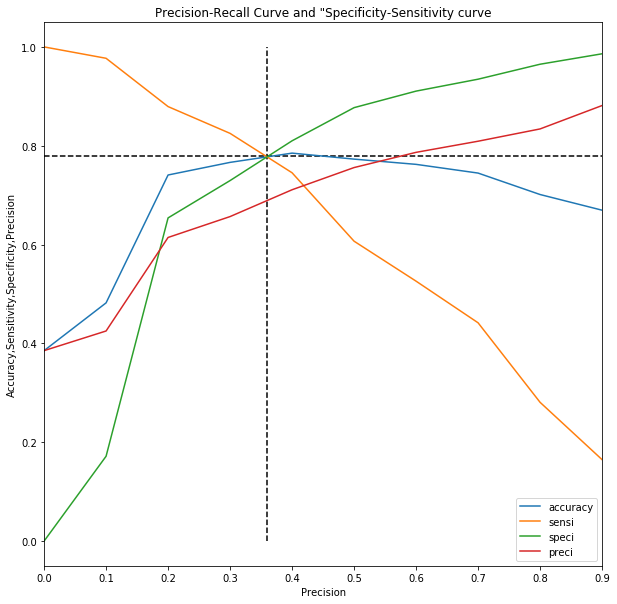

In [794]:
plt.rcParams["figure.figsize"] = (10,10)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci','preci'])
plt.title('Precision-Recall Curve and "Specificity-Sensitivity curve')
plt.xlabel('Precision')
plt.ylabel('Accuracy,Sensitivity,Specificity,Precision')
plt.vlines(x=0.36, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.78,xmax=1, xmin=0, colors="k", linestyles="--")
plt.show()

In [799]:
y_pred_final_LS['final_predicted'] = y_pred_final_LS.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_pred_final_LS.head()

,Converted,Lead_Number,Convert_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0,0.170897,1,1,0,0,0,0,0,0,0,0,0
1,0,1,0.259458,1,1,1,0,0,0,0,0,0,0,0
2,1,2,0.621852,1,1,1,1,1,1,1,0,0,0,1
3,0,3,0.113308,1,1,0,0,0,0,0,0,0,0,0
4,1,4,0.571109,1,1,1,1,1,1,0,0,0,0,1


## comparing the conversion rates with 0.3 cutoff

In [800]:
print(y_pred_final_LS["Converted"].value_counts(sum))
print(y_pred_final_LS["final_predicted"].value_counts(sum))

0    0.61461
1    0.38539
Name: Converted, dtype: float64
0    0.515801
1    0.484199
Name: final_predicted, dtype: float64


## There is a 23 percent increse in the conversion rate

## Let's check the overall accuracy of the Lead score model.

In [801]:
metrics.accuracy_score(y_pred_final_LS.Converted, y_pred_final_LS.final_predicted)

0.7663419913419913

In [802]:
confusion_opti = metrics.confusion_matrix(y_pred_final_LS.Converted, y_pred_final_LS.final_predicted )
confusion_opti

array([[4143, 1536],
       [ 623, 2938]])

In [803]:
TP = confusion_opti[1,1] # true positive 
TN = confusion_opti[0,0] # true negatives
FP = confusion_opti[0,1] # false positives
FN = confusion_opti[1,0] # false negatives

In [804]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7723665223665224

# sensitivity

In [805]:
TP / float(TP+FN)

0.8250491434990171

## Precision

In [806]:
TP/float(TP+FP)

0.6566830576665177

# specificity

In [388]:
TN / float(TN+FP)

0.7295298468040148

## Summary of the above plot
we chose the Optimal values resulting from the intersection of specificity and sensitivity == 0.3 and the intersection of specificity and Precision =0.45 and we determined that the cut off from the specificity and sensitivity == 0.3 resulted in a better specificity which is what is desirable for our model.
##We have a sensitivity of 83%

In [390]:
y_pred_final_LS["final_predicted"].value_counts(sum)

0    0.515801
1    0.484199
Name: final_predicted, dtype: float64

## Summary :  From the above calculations it is evident that 48% of the prospects become converts, however we can't label all of them as "Hot Leads".X_ed wants to be spending their time and resources on prospects with high conversion probability, hence anyone with a probability aka LEAD SCORE greater that 80% will be labelled "Hot Lead".

In [446]:
Lead_Score_df=y_pred_final_LS.copy()

## Creating a dataframe with prospects that have converted to a Lead

In [436]:
Lead_Score_df=Lead_Score_df[Lead_Score_df["final_predicted"]==1]

In [437]:
Lead_Score_df.shape

(4474, 14)

In [438]:
Lead_Score_df=Lead_Score_df.rename(columns={'Convert_Prob':'Lead_Score'})

In [439]:
Lead_Score_df['Lead_Status']=(Lead_Score_df["Lead_Score"]*100)

In [440]:
Lead_Score_df['Lead_Score']=round((Lead_Score_df["Lead_Score"]*100),0)

In [441]:
Lead_Score_df.head()

,Converted,Lead_Number,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Status
2,1,2,62.0,1,1,1,1,1,1,1,0,0,0,1,62.185216
4,1,4,57.0,1,1,1,1,1,1,0,0,0,0,1,57.110933
6,1,6,67.0,1,1,1,1,1,1,1,0,0,0,1,67.185183
10,1,10,63.0,1,1,1,1,1,1,1,0,0,0,1,62.711504
11,1,11,62.0,1,1,1,1,1,1,1,0,0,0,1,62.331115


In [442]:
Lead_Score_df.head()

,Converted,Lead_Number,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Status
2,1,2,62.0,1,1,1,1,1,1,1,0,0,0,1,62.185216
4,1,4,57.0,1,1,1,1,1,1,0,0,0,0,1,57.110933
6,1,6,67.0,1,1,1,1,1,1,1,0,0,0,1,67.185183
10,1,10,63.0,1,1,1,1,1,1,1,0,0,0,1,62.711504
11,1,11,62.0,1,1,1,1,1,1,1,0,0,0,1,62.331115


In [443]:
Lead_Score_df['Lead_Status'] = Lead_Score_df.Lead_Status.map(lambda x: "Hot_Lead" if x > 80 else "Lead")

In [762]:
Lead_Score_df

,Converted,Lead_Number,Convert_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0,0.170897,1,1,0,0,0,0,0,0,0,0,0
1,0,1,0.259458,1,1,1,0,0,0,0,0,0,0,0
2,1,2,0.621852,1,1,1,1,1,1,1,0,0,0,1
3,0,3,0.113308,1,1,0,0,0,0,0,0,0,0,0
4,1,4,0.571109,1,1,1,1,1,1,0,0,0,0,1
5,0,5,0.170897,1,1,0,0,0,0,0,0,0,0,0
6,1,6,0.671852,1,1,1,1,1,1,1,0,0,0,1
7,0,7,0.170897,1,1,0,0,0,0,0,0,0,0,0
8,0,8,0.078185,1,0,0,0,0,0,0,0,0,0,0
9,0,9,0.085980,1,0,0,0,0,0,0,0,0,0,0


In [445]:
Lead_Score_df["Lead_Status"].value_counts(sum)

Lead        0.732007
Hot_Lead    0.267993
Name: Lead_Status, dtype: float64

## Summary: 
After testing the model and obtaining the metrics we repeated the entire process for the main data frame.
we assigned the "probability of conversion" to "Lead score"
The Converts that had a lead score >= to 80% were then assigned the lable "Hot Lead"
The Converts that had the lead score less than 80% we assigned the labe1 "Lead"
### If X_Education is successful in reaching the "Hot Lead's" there is a 80% chance to for them CONVERT
